<a href="https://colab.research.google.com/github/jettecampbell/data-science/blob/main/JettCampU6proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Project: Making a Generalized Linear Model (multiple predictors)

In [1]:
!pip install bambi
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt
import bambi as bmb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 2.7 MB/s eta 0:00:00


For my project, I chose to use baseball statistics and make a generalized linear model of the OPS+ statistic. OPS+ (On Base Plus Slugging Plus) is a statistic given to every MLB player that is calculated by the sum of a player's OBP (On base percentage) and SLG (Slugging percentage) which is then normalized across the entire league and takes into acount different pitchers, stadiums, and other external conditions. Essentially, the average OPS+ is set to 100 for the entire MLB, and a higher value means a player gets more bases on average for each time at bat. I chose to predict this statistic because it's a very good statistic to determine the all around batting skill of a player as it also takes into account factors the player can't control. I wanted to see if I could make a model that generates a value similar to the real one without using the actual equation.

In [2]:
bb = pd.read_csv('https://raw.githubusercontent.com/jettecampbell/data-science/refs/heads/main/MLB%20Batting%20Stats%20-%20Sheet1.csv')

In [3]:
bb

,k,Player,Age,Team,Lg,WAR,G,PA,AB,R,...,OPS+,rOBA,Rbat+,TB,GIDP,HBP,SH,SF,IBB,Pos
0,1.0,Jarren Duran*,27.0,BOS,AL,8.7,160.0,735.0,671.0,111.0,...,129.0,0.373,134.0,330.0,6.0,6.0,1.0,3.0,1.0,OF
1,2.0,Shohei Ohtani*,29.0,LAD,NL,9.2,159.0,731.0,636.0,134.0,...,190.0,0.449,190.0,411.0,7.0,6.0,0.0,5.0,10.0,DH
2,3.0,Gunnar Henderson*,23.0,BAL,AL,9.1,159.0,719.0,630.0,118.0,...,159.0,0.385,157.0,333.0,2.0,7.0,0.0,4.0,1.0,SS
3,4.0,Marcus Semien,33.0,TEX,AL,4.1,159.0,718.0,650.0,101.0,...,100.0,0.310,100.0,254.0,9.0,3.0,0.0,1.0,2.0,2B
4,5.0,Juan Soto*,25.0,NYY,AL,7.9,157.0,713.0,576.0,128.0,...,178.0,0.424,179.0,328.0,10.0,4.0,0.0,4.0,2.0,OF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,738.0,Josh Winckowski,26.0,BOS,AL,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN
772,739.0,Kirby Yates*,37.0,TEX,AL,0.0,3.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN
773,740.0,Alex Young*,30.0,CIN,NL,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN
774,741.0,Guillo Zuñiga,25.0,LAA,AL,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [4]:
bb = bb.query('PA > 200') #Gets rid of all players under 200 plate appearances to minimize outliers

For my first model, I used just On Base Percentage and Slugging Percentage because those are the main values used to calculate OPS+.

In [5]:
model_os_bb = bmb.Model("`OPS+` ~ `OBP` + 'SLG'", data=bb)
idata_os_bb = model_os_bb.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

In [6]:
model_os_bb

       Formula: `OPS+` ~ `OBP` + 'SLG'
        Family: gaussian
          Link: mu = identity
  Observations: 365
        Priors: 
    target = mu
        Common-level effects
            Intercept ~ Normal(mu: 100.1123, sigma: 708.0565)
            OBP ~ Normal(mu: 0.0, sigma: 1894.7531)
            SLG ~ Normal(mu: 0.0, sigma: 958.7968)
        
        Auxiliary parameters
            sigma ~ HalfStudentT(nu: 4.0, sigma: 26.2312)
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()

I also made another model using home runs and strike outs as predictors because a better batter would generally have more home runs and less strike outs.

In [7]:
model_hs_bb = bmb.Model("`OPS+` ~ `HR` + 'SO'", data=bb)
idata_hs_bb = model_hs_bb.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

In [8]:
model_hs_bb

       Formula: `OPS+` ~ `HR` + 'SO'
        Family: gaussian
          Link: mu = identity
  Observations: 365
        Priors: 
    target = mu
        Common-level effects
            Intercept ~ Normal(mu: 100.1123, sigma: 203.7019)
            HR ~ Normal(mu: 0.0, sigma: 7.137)
            SO ~ Normal(mu: 0.0, sigma: 1.71)
        
        Auxiliary parameters
            sigma ~ HalfStudentT(nu: 4.0, sigma: 26.2312)
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()

After creating both these first basic models, I compared them to see which set of predictors worked better.

In [9]:
os_df_hs = az.compare( {"OBP and SLG":idata_os_bb,"HR and SO":idata_hs_bb} )
os_df_hs

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
OBP and SLG,0,-1029.665851,4.012164,0.000000,1.000000e+00,13.684998,0.000000,False,log
HR and SO,1,-1558.913484,4.472192,529.247633,2.942091e-14,14.954987,19.351037,False,log


While both models have elpd_loo values in the negatives, OBP and SLG showed to be much better predictors than HRs and SOs.

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

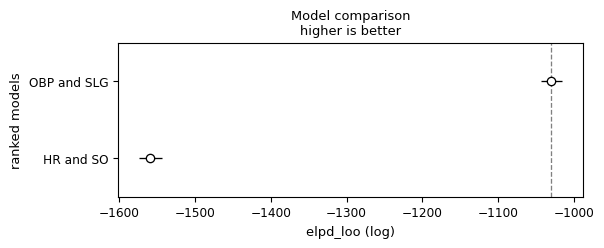

In [10]:
az.plot_compare(os_df_hs)

With that knowledge, I created  some additional models using OBP and SLG as predictors in addition to other interactions. The first model here uses OBP and SLG as predictors with player posotion interacting with both OBP and SLG.

In [11]:
model_osp_bb = bmb.Model("`OPS+` ~ `OBP` + 'SLG' + Pos:OBP + Pos:SLG", data=bb)
idata_osp_bb = model_osp_bb.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

In [12]:
model_osp_bb

       Formula: `OPS+` ~ `OBP` + 'SLG' + Pos:OBP + Pos:SLG
        Family: gaussian
          Link: mu = identity
  Observations: 365
        Priors: 
    target = mu
        Common-level effects
            Intercept ~ Normal(mu: 100.1123, sigma: 714.5588)
            OBP ~ Normal(mu: 0.0, sigma: 1894.7531)
            SLG ~ Normal(mu: 0.0, sigma: 958.7968)
            Pos:OBP ~ Normal(mu: [0. 0. 0. 0. 0. 0. 0.], sigma: [813.4398 745.8662 659.3042 843.4514
                445.1608 681.7144 630.1709])
            Pos:SLG ~ Normal(mu: [0. 0. 0. 0. 0. 0. 0.], sigma: [639.4867 562.9007 511.5319 637.8944
                337.5062 527.4131 529.2025])
        
        
        Auxiliary parameters
            sigma ~ HalfStudentT(nu: 4.0, sigma: 26.2312)
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()

I also tried a model with OBP and SLG and the addition of HR as a predictor, and another model with SO as a predictor instead to see how they would turn out.

In [13]:
model_osh_bb = bmb.Model("`OPS+` ~ `OBP` + 'SLG' + 'HR'", data=bb)
idata_osh_bb = model_osh_bb.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

In [14]:
model_osh_bb

       Formula: `OPS+` ~ `OBP` + 'SLG' + 'HR'
        Family: gaussian
          Link: mu = identity
  Observations: 365
        Priors: 
    target = mu
        Common-level effects
            Intercept ~ Normal(mu: 100.1123, sigma: 714.8038)
            OBP ~ Normal(mu: 0.0, sigma: 1894.7531)
            SLG ~ Normal(mu: 0.0, sigma: 958.7968)
            HR ~ Normal(mu: 0.0, sigma: 7.137)
        
        Auxiliary parameters
            sigma ~ HalfStudentT(nu: 4.0, sigma: 26.2312)
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()

In [19]:
model_oss_bb = bmb.Model("`OPS+` ~ `OBP` + 'SLG' + 'SO'", data=bb)
idata_oss_bb = model_oss_bb.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

In [20]:
model_oss_bb

       Formula: `OPS+` ~ `OBP` + 'SLG' + 'SO'
        Family: gaussian
          Link: mu = identity
  Observations: 365
        Priors: 
    target = mu
        Common-level effects
            Intercept ~ Normal(mu: 100.1123, sigma: 727.2808)
            OBP ~ Normal(mu: 0.0, sigma: 1894.7531)
            SLG ~ Normal(mu: 0.0, sigma: 958.7968)
            SO ~ Normal(mu: 0.0, sigma: 1.71)
        
        Auxiliary parameters
            sigma ~ HalfStudentT(nu: 4.0, sigma: 26.2312)
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()

In [21]:
os_df_osp = az.compare( {"OBP and SLG":idata_os_bb,"OBP and SLG with Position":idata_osp_bb,"OBP and SLG with HR":idata_osh_bb,"OBP and SLG with SO":idata_oss_bb} )
os_df_osp

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
OBP and SLG with HR,0,-1026.294004,4.993768,0.000000,8.256204e-01,13.714202,0.000000,False,log
OBP and SLG,1,-1029.665851,4.012164,3.371848,1.743796e-01,13.684998,3.243656,False,log
OBP and SLG with SO,2,-1030.515910,5.303130,4.221906,0.000000e+00,13.708083,2.595468,False,log
OBP and SLG with Position,3,-1040.446141,17.696547,14.152137,4.851675e-14,13.744379,4.175744,False,log


Suprisingly, includuding postion to interact with OBP and SLG as well as Strike Outs actually lowered the elpd_loo value. This is likely due to overfitting and these predictors not having much influence over OPS+. The best model was the OBP and SLG model with Home runs likely due to its direct correlation with On Base Percentage.

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

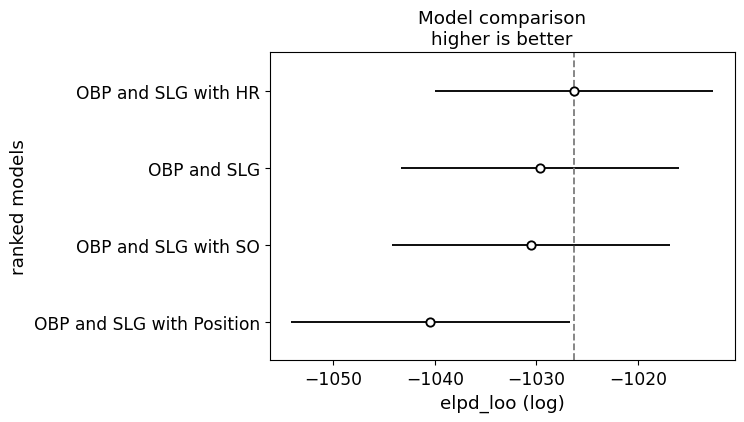

In [22]:
az.plot_compare(os_df_osp)

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 2100x1300 with 1 Axes>,
 array([<Axes: xlabel='OBP', ylabel='OPS+'>], dtype=object))

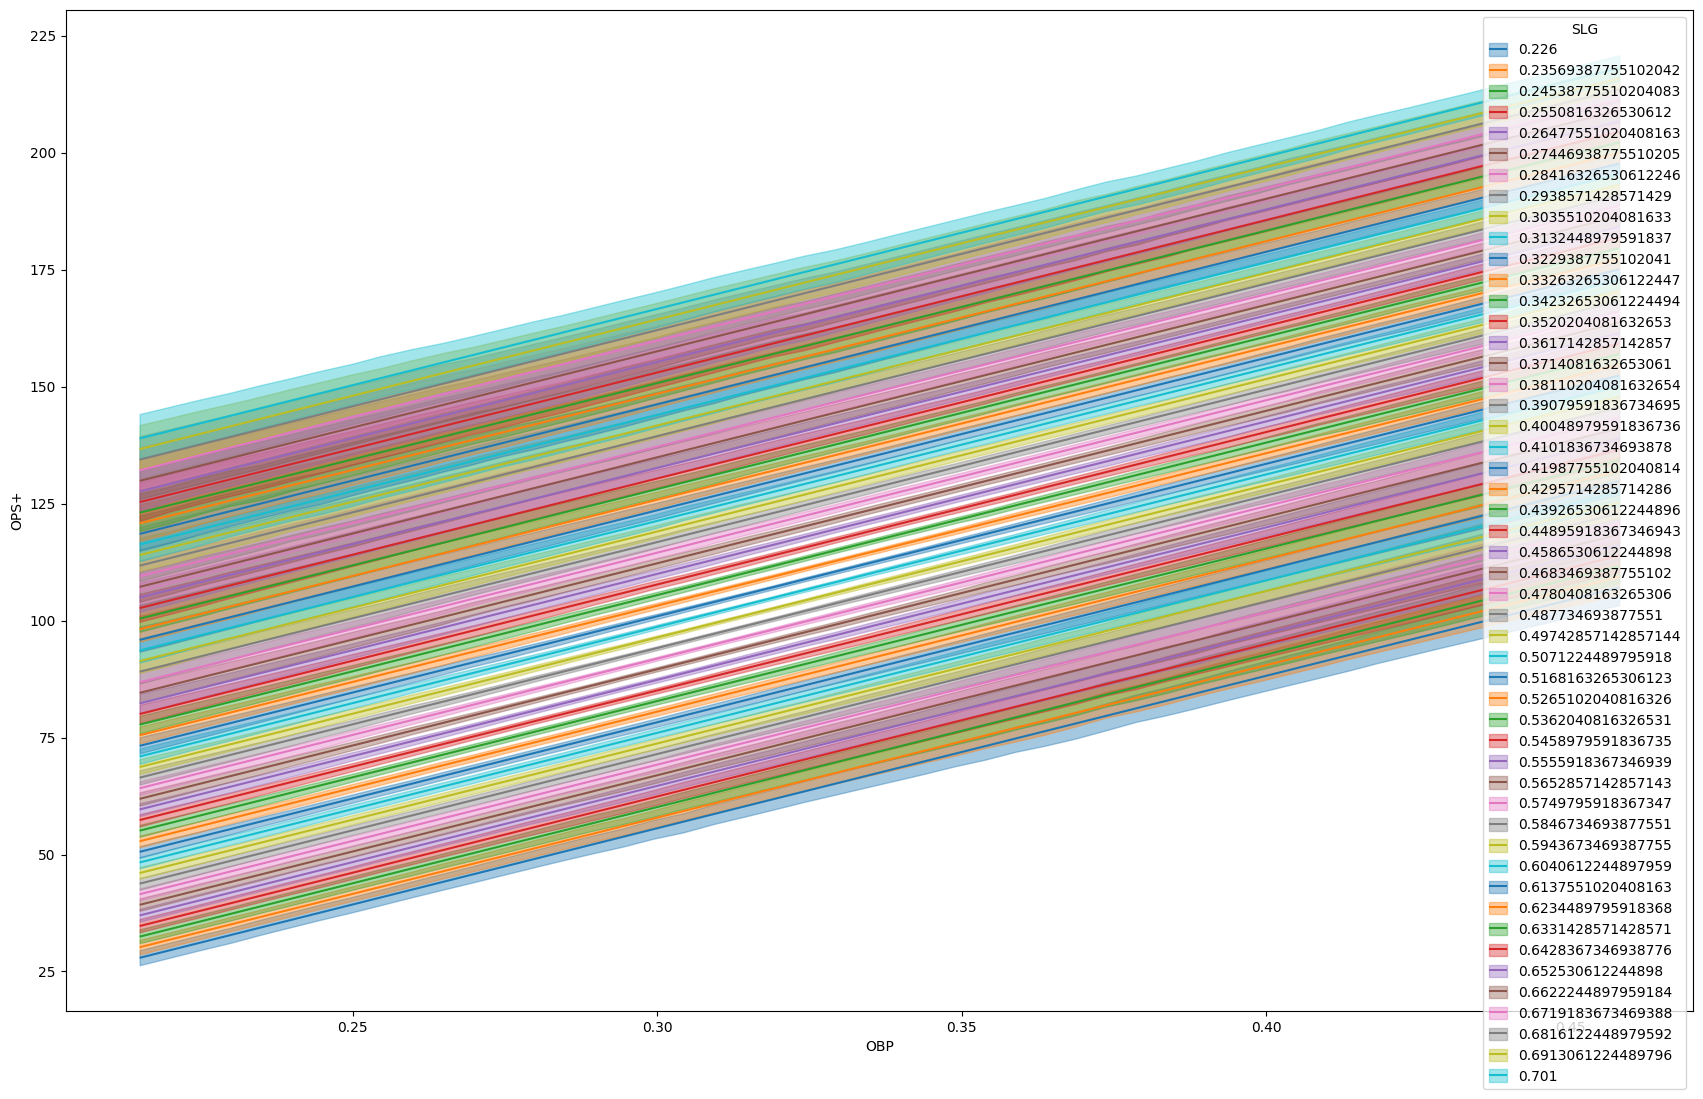

In [31]:
bmb.interpret.plot_predictions(model_osh_bb, idata_osh_bb, ["OBP", "SLG"],
                               fig_kwargs={"figsize":(21,13)})

This plot with OBP, SLG, and HR as predictors shows a postive trend between OPS+ and the predictors. This matched my expectations because OBP and SLG are the primary statistics used to calcualte the actual value. Home runs also most likely perform better than position and strikeouts because it is the most correlated with the number of bases a player earns, which is what OBP is. It did suprise me how poistion and strikeouts created such lower elpd_loo values, but my best guess for this result is overfitting. Position wouldn't have much influence on how good a player is at batting because every position still bats. Strikeouts on the other hand are a statistic that represents the lack of bases earned each time a player is at bat, but since they don't happen too often they likely just had not much influence to OPS+. Overall, it was interesting to see which statistics play the most and least influential roles in a players OPS+ and I'll be sure to take this knowledge into account next time I watch baseball.